# 7072CEM COURSEWORK

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler #normalizing the dataset
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from numpy import mean, std
from imblearn.over_sampling import RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from sklearn.naive_bayes import GaussianNB

# ------  Load the Dataset ------
df = pd.read_csv("diabetes.csv") 
df.head(10)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# ------  Exploratory Data Analysis (EDA) ------

In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Number of times pregnant       768 non-null    int64  
 1   Plasma glucose concentration   768 non-null    int64  
 2   Diastolic blood pressure       768 non-null    int64  
 3   Triceps skinfold thickness     768 non-null    int64  
 4   2-Hour serum insulin           768 non-null    int64  
 5   Body mass index                768 non-null    float64
 6   Diabetes pedigree function     768 non-null    float64
 7   Age                            768 non-null    int64  
 8   Target                         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0, 0.5, 'Frequency')

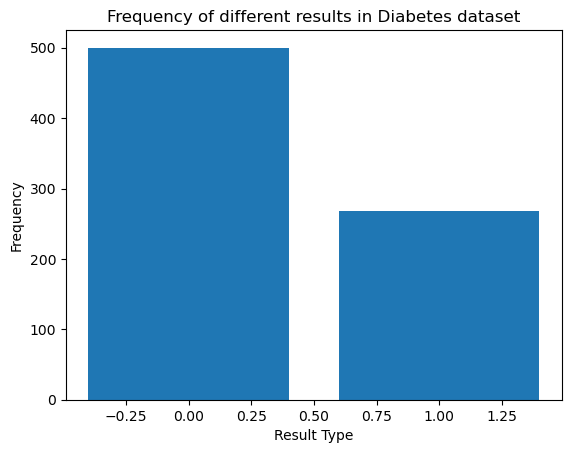

In [24]:
#ploting a chart to show the number ofdaibetic and non-diabetic
fig, chart = plt.subplots()
data = df['Target'].value_counts()
points = data.index
frequency = data.values
chart.bar(points, frequency)
chart.set_title('Frequency of different results in Diabetes dataset')
chart.set_xlabel('Result Type')
chart.set_ylabel('Frequency')

# ------  Preprocessing ------

In [25]:
# Check for missing values
print(df.isnull().sum()) 


Number of times pregnant         0
Plasma glucose concentration     0
Diastolic blood pressure         0
Triceps skinfold thickness       0
2-Hour serum insulin             0
Body mass index                  0
Diabetes pedigree function       0
Age                              0
Target                           0
dtype: int64


In [26]:
# there are a lot of 0 values which can affect our result
# therefore the zeros have to be cleaned, in this case with the median

# Chosen columns to replace 0 values
chosen_columns = ['Plasma glucose concentration ',
       'Diastolic blood pressure ', 'Triceps skinfold thickness ',
       '2-Hour serum insulin ', 'Body mass index ',
       'Diabetes pedigree function', 'Age']

# Replace 0 values with median of chosen columns
for col in chosen_columns:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

df.head(10)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Target
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


In [27]:

# Separate features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# STANDARDIZING THE DATA SO AS THEY HAVE EQUAL CONTRIBUTION TO THE MODEL
# Fit scaler on Random Under Sampling data
norm = MinMaxScaler().fit(X)
# Transform training data
X_norm = norm.transform(X)

X_norm = pd.DataFrame(norm.transform(X), columns=X.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_norm, y)


print('After the Smote sampling: ')
print('Class No ', (y_resampled == 0).sum())
print('Class Yes ', (y_resampled == 1).sum())

X_norm.head(10)

After the Smote sampling: 
Class No  500
Class Yes  500


,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
5,0.294118,0.464516,0.510204,0.173913,0.019832,0.151329,0.052519,0.150000
6,0.176471,0.219355,0.265306,0.271739,0.088942,0.261759,0.072588,0.083333
7,0.588235,0.458065,0.489796,0.173913,0.019832,0.349693,0.023911,0.133333
8,0.117647,0.987097,0.469388,0.413043,0.635817,0.251534,0.034159,0.533333
9,0.470588,0.522581,0.734694,0.173913,0.019832,0.282209,0.065756,0.550000


# Cross validation to find best Hyperparameters

In [135]:
param_grid = {
    'Random Forest': {
        'n_estimators': [1, 10, 100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'none'],
        'solver': ['liblinear', 'lbfgs'],
        'class_weight':[{0: 0.5, 1: 1, 2: 2}]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': [ 'auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric': ['euclidean', 'manhattan', 'chebyshev', 'hamming', 'jaccard']
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    },
    'XGBoost': {
        'n_estimators': [10, 20, 100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 9],
        'subsample': [0.8, 0.9, 1.0]
    }
}

models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

for name, model in models.items():
    model.set_params(**grid_search.best_params_[name])
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {name}: {scores}")
    print(f"Mean cross-validation score for {name}: {scores.mean()}")

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_mode

Best parameters for Logistic Regression: {'C': 0.01, 'class_weight': {0: 0.5, 1: 1, 2: 2}, 'penalty': 'none', 'solver': 'lbfgs'}


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\neighbors\_base.py", line 493, in _fit
    self._check_algorithm_metric()
  File "C:\

Best parameters for KNN: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 20, 'subsample': 1.0}
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}


KeyError: 'Random Forest'

# PCA with 2 components

[0.33663247 0.22857381]
[0.33663247 0.56520628]


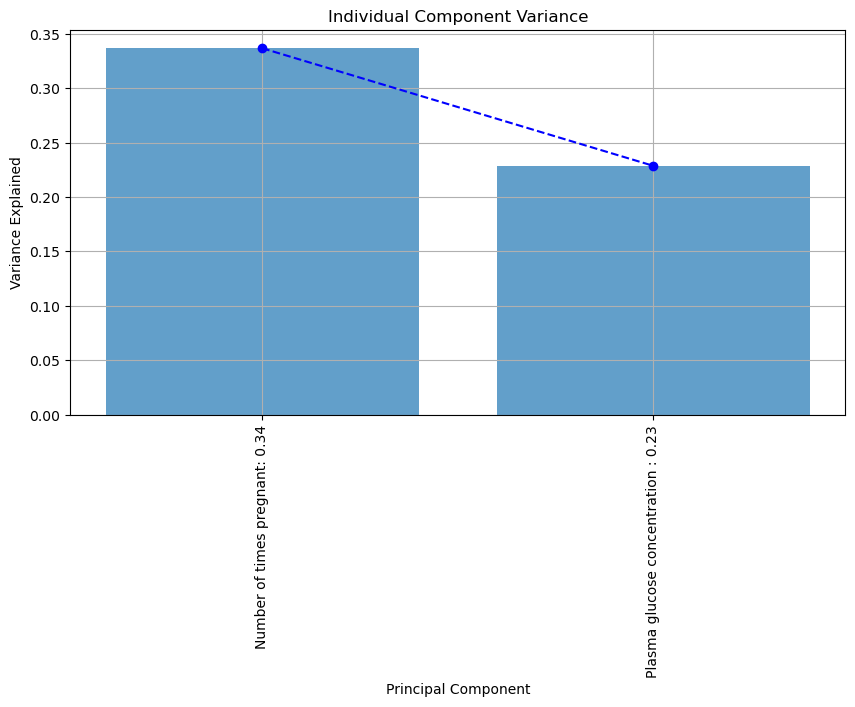

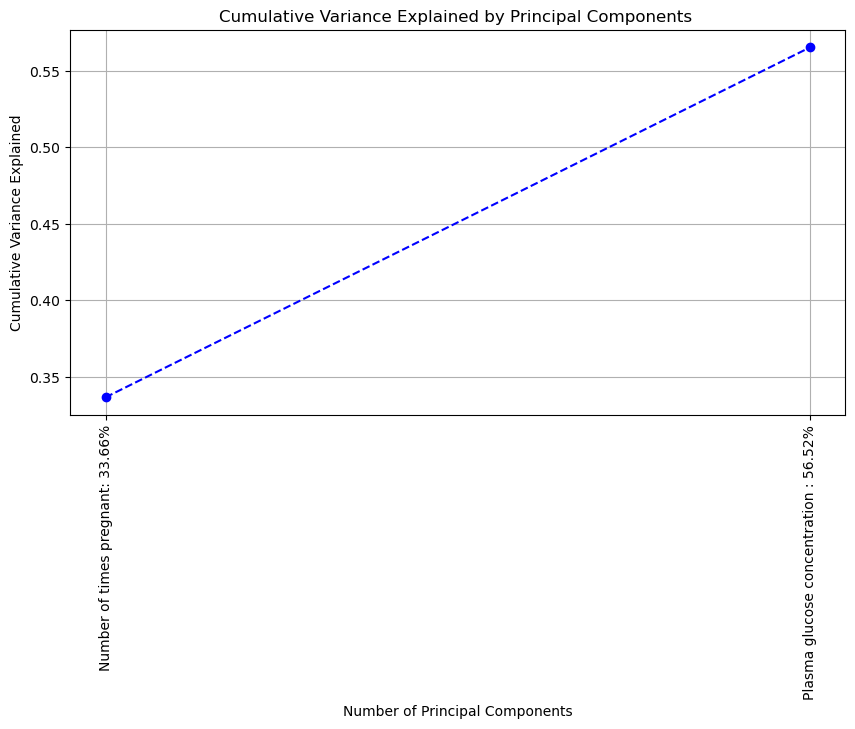

In [28]:
# Apply PCA
pca = PCA(n_components=2)


X_pca2 = pca.fit_transform(X_resampled)
# Individual component variance
individual_variance = pca.explained_variance_ratio_
print(individual_variance)

# Cumulative variance explained by each component
cumulative_variance_ratio_ = individual_variance.cumsum()
print(cumulative_variance_ratio_)

# Getting the names of the original features
feature_names = X_resampled.columns

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), individual_variance, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Individual Component Variance')
plt.xticks(range(1, len(individual_variance) + 1),[f"{feature_names[i]}: {individual_variance[i]:.2f}" for i in range(len(individual_variance))], rotation=90)
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), cumulative_variance_ratio_, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components ')
plt.xticks(range(1, len(cumulative_variance_ratio_) + 1),[f"{feature_names[i]}: {cumulative_variance_ratio_[i] * 100:.2f}%" for i in range(len(cumulative_variance_ratio_))], rotation=90)
plt.grid(True)
plt.show()

# Training and Testing accuracy with all the models using 2 PCA components SMOTE balancing

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


                     training_accuracy  accuracy  precision    recall  \
Logistic Regression            0.74875     0.750   0.683453  0.940594   
Random Forest                  0.82250     0.740   0.733333  0.762376   
SVM                            0.77375     0.745   0.715517  0.821782   
KNN                            0.85250     0.745   0.735849  0.772277   
Naive Bayes                    0.73625     0.715   0.650685  0.940594   
XGBoost                        0.86500     0.695   0.708333  0.673267   

                     f1_score  
Logistic Regression  0.791667  
Random Forest        0.747573  
SVM                  0.764977  
KNN                  0.753623  
Naive Bayes          0.769231  
XGBoost              0.690355  


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


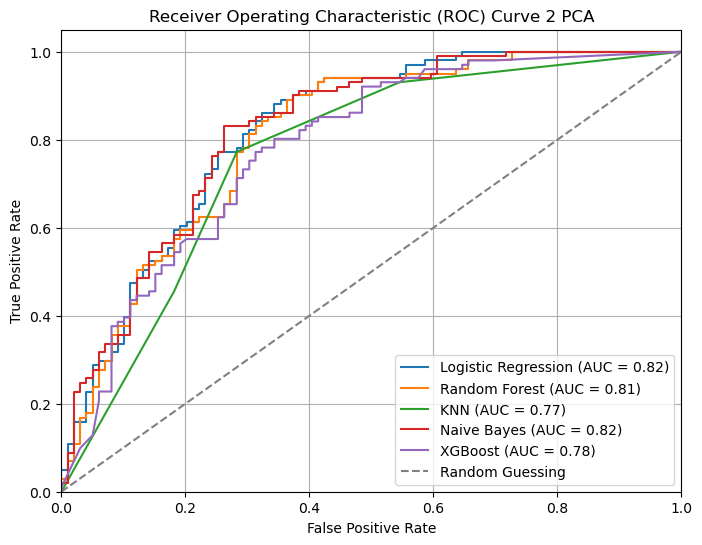

In [183]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca2, y_resampled, test_size=0.20, random_state=42)

# ------  Modeling ------
models = {
    'Logistic Regression': LogisticRegression(C=0.01, penalty='none', solver='lbfgs', class_weight = {0: 0.5, 1: 1, 2: 2}, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=25, n_estimators=200, random_state=42),
    'SVM': SVC(C=20, kernel='rbf', random_state=42), 
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Naive Bayes': GaussianNB(priors= [0.3, 0.7]),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=10, subsample=0.8)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    # Use cross-validation for more robust evaluation
    #cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'training_accuracy': accuracy_score(y_train, y_train_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# ------  Results Visualization ------
print(pd.DataFrame(results).T)

# Train and evaluate models
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores[name] = roc_auc

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve 2 PCA')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Training and Testing accuracy with all the models using 4 PCA components SMOTE balancing

[0.33663247 0.22857381 0.11165831 0.09383221]
[0.33663247 0.56520628 0.6768646  0.77069681]


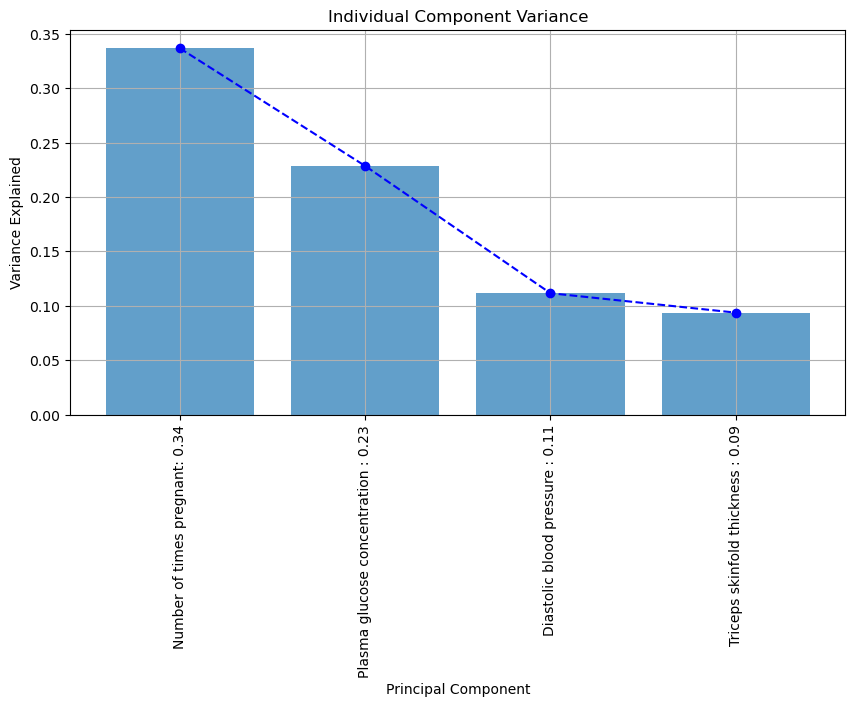

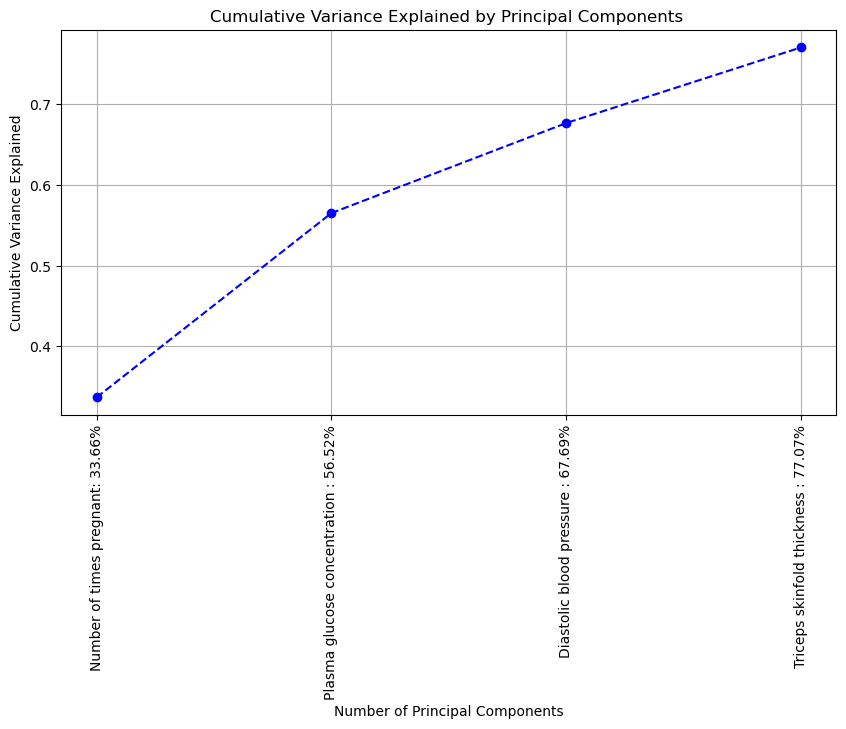

In [179]:
# Apply PCA(4 Component)
pca = PCA(n_components=4)


X_pca4 = pca.fit_transform(X_resampled)
# Individual component variance
individual_variance = pca.explained_variance_ratio_
print(individual_variance)

# Cumulative variance explained by each component
cumulative_variance_ratio_ = individual_variance.cumsum()
print(cumulative_variance_ratio_)

# Getting the names of the original features
feature_names = X_resampled.columns

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), individual_variance, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Individual Component Variance')
plt.xticks(range(1, len(individual_variance) + 1),[f"{feature_names[i]}: {individual_variance[i]:.2f}" for i in range(len(individual_variance))], rotation=90)
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), cumulative_variance_ratio_, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components ')
plt.xticks(range(1, len(cumulative_variance_ratio_) + 1),[f"{feature_names[i]}: {cumulative_variance_ratio_[i] * 100:.2f}%" for i in range(len(cumulative_variance_ratio_))], rotation=90)
plt.grid(True)
plt.show()

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


                     training_accuracy  accuracy  precision    recall  \
Logistic Regression            0.74250     0.755   0.688406  0.940594   
Random Forest                  0.85000     0.775   0.750000  0.831683   
SVM                            0.83750     0.765   0.736842  0.831683   
KNN                            0.86875     0.775   0.741379  0.851485   
Naive Bayes                    0.73125     0.720   0.653061  0.950495   
XGBoost                        0.90875     0.725   0.705357  0.782178   

                     f1_score  
Logistic Regression  0.794979  
Random Forest        0.788732  
SVM                  0.781395  
KNN                  0.792627  
Naive Bayes          0.774194  
XGBoost              0.741784  


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


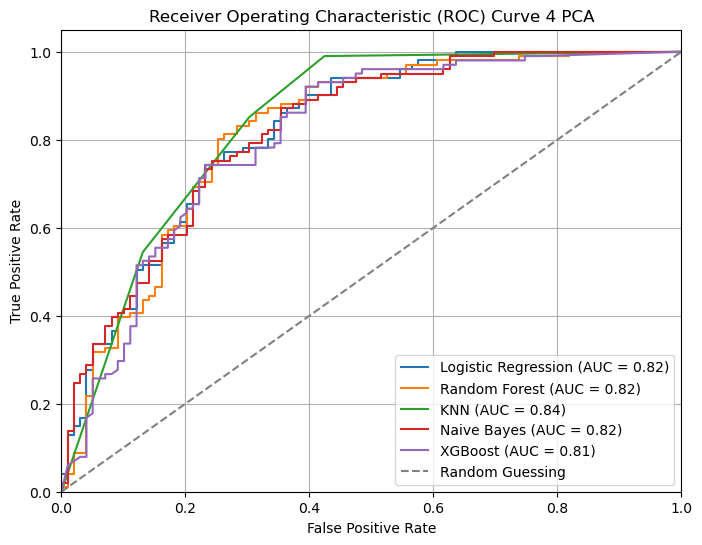

In [184]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca4, y_resampled, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(C=0.01, penalty='none', solver='lbfgs', class_weight = {0: 0.5, 1: 1, 2: 2}, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=25, n_estimators=200, random_state=42),
    'SVM': SVC(C=20, kernel='rbf', random_state=42), 
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Naive Bayes': GaussianNB(priors= [0.3, 0.7]),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=10, subsample=0.8)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    # Use cross-validation for more robust evaluation
    #cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'training_accuracy': accuracy_score(y_train, y_train_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# ------  Results Visualization ------
print(pd.DataFrame(results).T)

# Train and evaluate models
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores[name] = roc_auc

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve 4 PCA')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# PCA with all the components - SMOTE balancing

[0.33663247 0.22857381 0.11165831 0.09383221 0.08865093 0.06631436
 0.04779312 0.02654478]
[0.33663247 0.56520628 0.6768646  0.77069681 0.85934774 0.9256621
 0.97345522 1.        ]


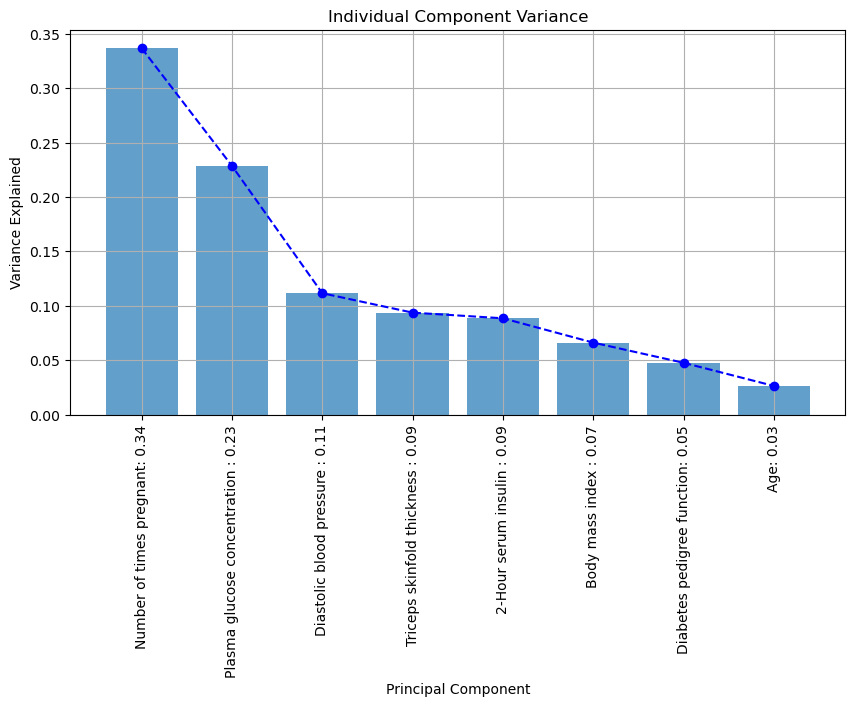

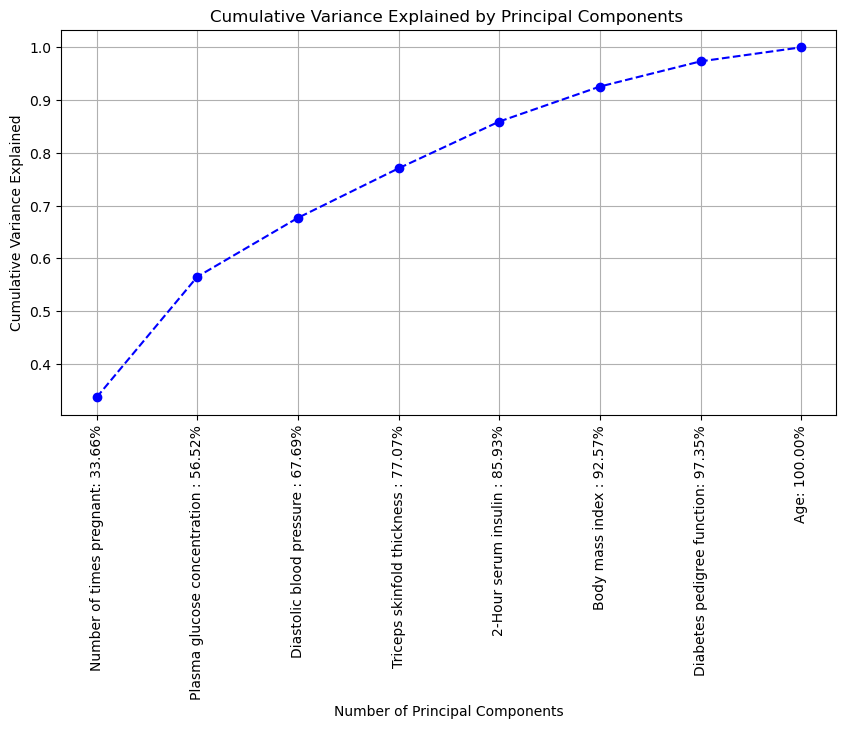

In [181]:
# Apply PCA(all Component)
pca = PCA()


X_pca = pca.fit_transform(X_resampled)
# Individual component variance
individual_variance = pca.explained_variance_ratio_
print(individual_variance)

# Cumulative variance explained by each component
cumulative_variance_ratio_ = individual_variance.cumsum()
print(cumulative_variance_ratio_)

# Getting the names of the original features
feature_names = X_resampled.columns

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), individual_variance, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Individual Component Variance')
plt.xticks(range(1, len(individual_variance) + 1),[f"{feature_names[i]}: {individual_variance[i]:.2f}" for i in range(len(individual_variance))], rotation=90)
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), cumulative_variance_ratio_, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components ')
plt.xticks(range(1, len(cumulative_variance_ratio_) + 1),[f"{feature_names[i]}: {cumulative_variance_ratio_[i] * 100:.2f}%" for i in range(len(cumulative_variance_ratio_))], rotation=90)
plt.grid(True)
plt.show()

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


                     training_accuracy  accuracy  precision    recall  \
Logistic Regression            0.76125     0.725   0.671642  0.891089   
Random Forest                  0.89000     0.800   0.769912  0.861386   
SVM                            0.91875     0.770   0.739130  0.841584   
KNN                            0.87625     0.800   0.765217  0.871287   
Naive Bayes                    0.73875     0.725   0.661972  0.930693   
XGBoost                        0.92125     0.775   0.754545  0.821782   

                     f1_score  
Logistic Regression  0.765957  
Random Forest        0.813084  
SVM                  0.787037  
KNN                  0.814815  
Naive Bayes          0.773663  
XGBoost              0.786730  


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


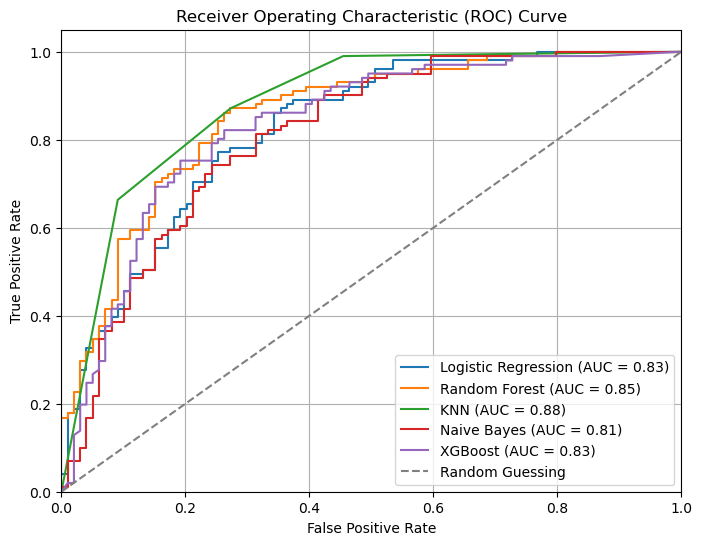

In [182]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)

# ------  Modeling ------
models = {
    'Logistic Regression': LogisticRegression(C=0.01, penalty='none', solver='lbfgs', class_weight = {0: 0.5, 1: 1, 2: 2}, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=25, n_estimators=200, random_state=42),
    'SVM': SVC(C=20, kernel='rbf', random_state=42), 
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Naive Bayes': GaussianNB(priors= [0.3, 0.7]),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=10, subsample=0.8)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    # Use cross-validation for more robust evaluation
    #cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'training_accuracy': accuracy_score(y_train, y_train_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# ------  Results Visualization ------
print(pd.DataFrame(results).T)

# Train and evaluate models
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores[name] = roc_auc

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [160]:
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from collections import Counter

# ------  Load the Dataset ------
diabetes = pd.read_csv("diabetes.csv") 

# there are a lot of 0 values which can affect our result
# therefore the zeros have to be cleaned, in this case with the median

# Chosen columns to replace 0 values
chosen_columns = ['Plasma glucose concentration ',
       'Diastolic blood pressure ', 'Triceps skinfold thickness ',
       '2-Hour serum insulin ', 'Body mass index ',
       'Diabetes pedigree function', 'Age']

# Replace 0 values with median of chosen columns
for col in chosen_columns:
    median = diabetes[col].median()
    diabetes[col] = diabetes[col].replace(0, median)

diabetes.head(10)

# Separate features (X) and target (y)
X = diabetes.drop('Target', axis=1)
y = diabetes['Target']

# STANDARDIZING THE DATA SO AS THEY HAVE EQUAL CONTRIBUTION TO THE MODEL
# Fit scaler on Random Under Sampling data
norm = MinMaxScaler().fit(X)
# Transform training data
X_norm = norm.transform(X)

X_norm = pd.DataFrame(norm.transform(X), columns=X.columns)

# Print original class distribution
print('Original class distribution:')
print(Counter(y))

# Oversample using ADASYN
oversample = ADASYN(random_state=42)
X_adasyn, y_adasyn = oversample.fit_resample(X_norm, y)

# Oversample using BorderlineSMOTE
oversample = BorderlineSMOTE(random_state=42)
X_smote_borderline, y_smote_borderline = oversample.fit_resample(X_norm, y)

# Oversample using SVMSMOTE
oversample = SVMSMOTE(random_state=42)
X_smote_svm, y_smote_svm = oversample.fit_resample(X_norm, y)


# Print class distribution after oversampling
print('Class distribution after ADASYN:')
print(Counter(y_adasyn))

print('Class distribution after BorderlineSMOTE:')
print(Counter(y_smote_borderline))

print('Class distribution after SVMSMOTE:')
print(Counter(y_smote_svm))

Original class distribution:
Counter({0: 500, 1: 268})
Class distribution after ADASYN:
Counter({1: 510, 0: 500})
Class distribution after BorderlineSMOTE:
Counter({1: 500, 0: 500})
Class distribution after SVMSMOTE:
Counter({1: 500, 0: 500})
Class distribution after KMeansSMOTE:
Counter({1: 502, 0: 500})


[0.34612281 0.21164662]
[0.34612281 0.55776943]


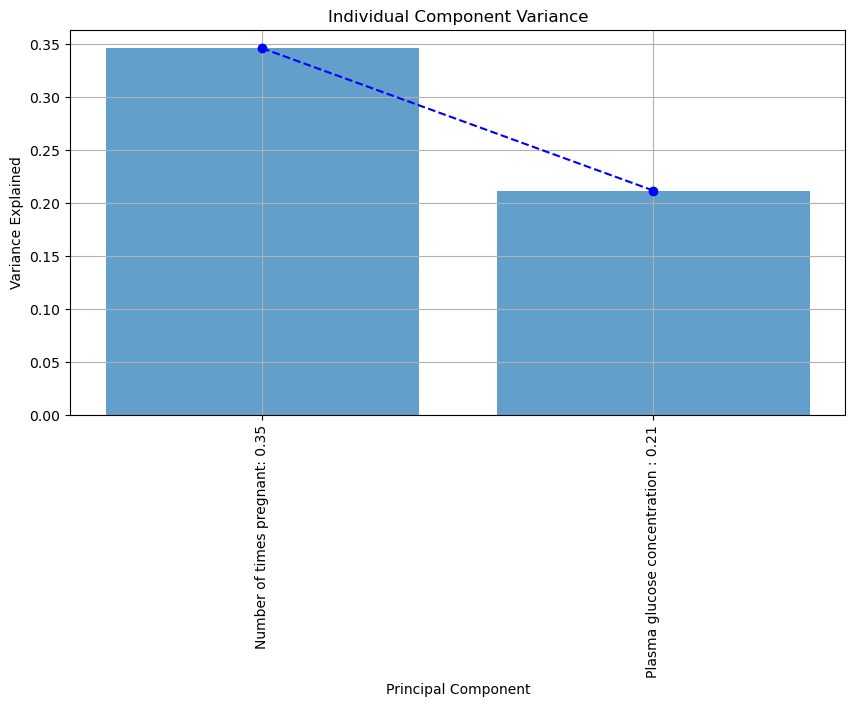

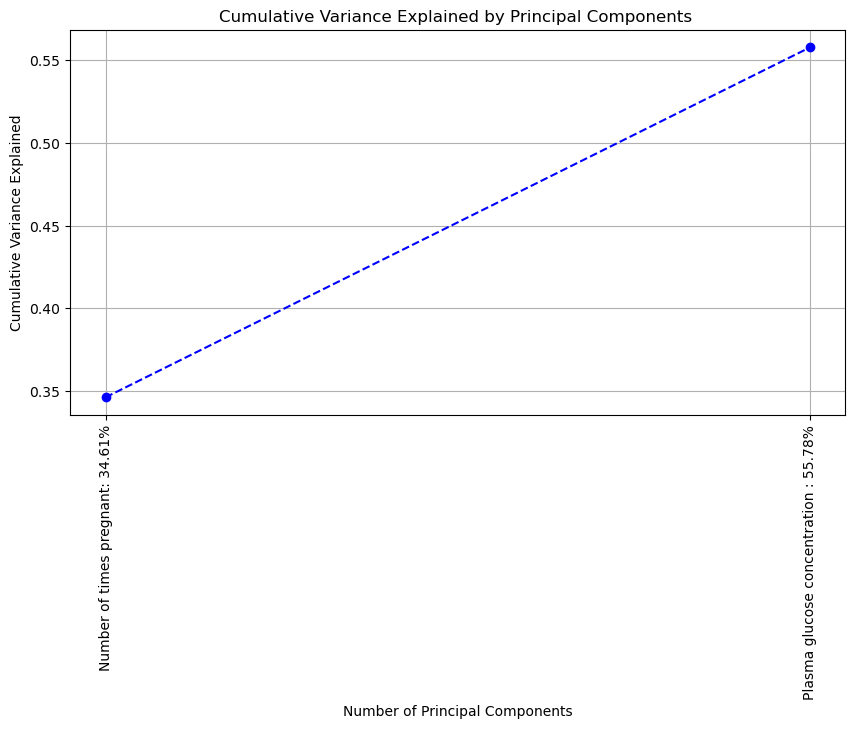

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


                     training_accuracy  accuracy  precision  recall  f1_score
Logistic Regression           0.714109  0.688119   0.639098    0.85  0.729614
Random Forest                 0.782178  0.717822   0.683761    0.80  0.737327
SVM                           0.742574  0.702970   0.669492    0.79  0.724771
KNN                           0.830446  0.668317   0.648649    0.72  0.682464
Naive Bayes                   0.699257  0.653465   0.602740    0.88  0.715447
XGBoost                       0.829208  0.712871   0.675000    0.81  0.736364


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


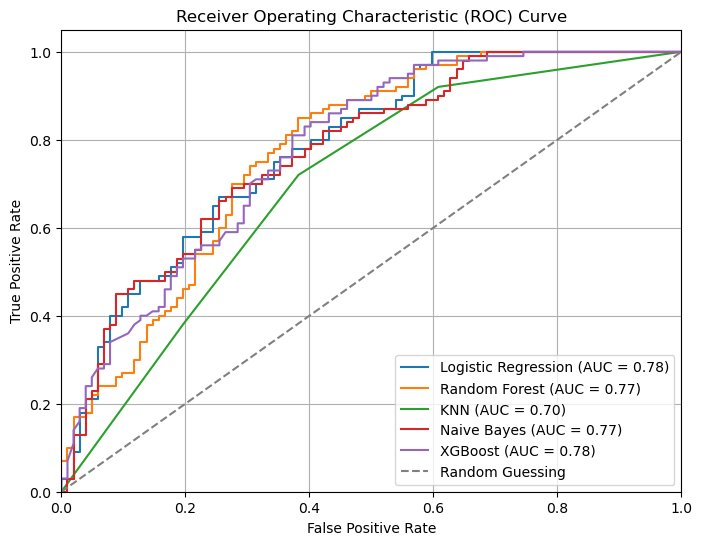

In [168]:
# Apply PCA
pca = PCA(n_components=2)


X_adasyn_pca2 = pca.fit_transform(X_adasyn)
# Individual component variance
individual_variance = pca.explained_variance_ratio_
print(individual_variance)

# Cumulative variance explained by each component
cumulative_variance_ratio_ = individual_variance.cumsum()
print(cumulative_variance_ratio_)

# Getting the names of the original features
feature_names = X_adasyn.columns

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), individual_variance, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Individual Component Variance')
plt.xticks(range(1, len(individual_variance) + 1),[f"{feature_names[i]}: {individual_variance[i]:.2f}" for i in range(len(individual_variance))], rotation=90)
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), cumulative_variance_ratio_, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components ')
plt.xticks(range(1, len(cumulative_variance_ratio_) + 1),[f"{feature_names[i]}: {cumulative_variance_ratio_[i] * 100:.2f}%" for i in range(len(cumulative_variance_ratio_))], rotation=90)
plt.grid(True)
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_adasyn_pca2, y_adasyn, test_size=0.2, random_state=42)

# ------  Modeling ------
models = {
    'Logistic Regression': LogisticRegression(C=0.01, penalty='none', solver='lbfgs', class_weight = {0: 0.5, 1: 1, 2: 2}, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=25, n_estimators=200, random_state=42),
    'SVM': SVC(C=20, kernel='rbf', random_state=42), 
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Naive Bayes': GaussianNB(priors= [0.3, 0.7]),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=10, subsample=0.8)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    # Use cross-validation for more robust evaluation
    #cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'training_accuracy': accuracy_score(y_train, y_train_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# ------  Results Visualization ------
print(pd.DataFrame(results).T)


from sklearn.metrics import roc_curve, auc


# Train and evaluate models
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores[name] = roc_auc

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

[0.34612281 0.21164662 0.11326203 0.09607182]
[0.34612281 0.55776943 0.67103146 0.76710328]


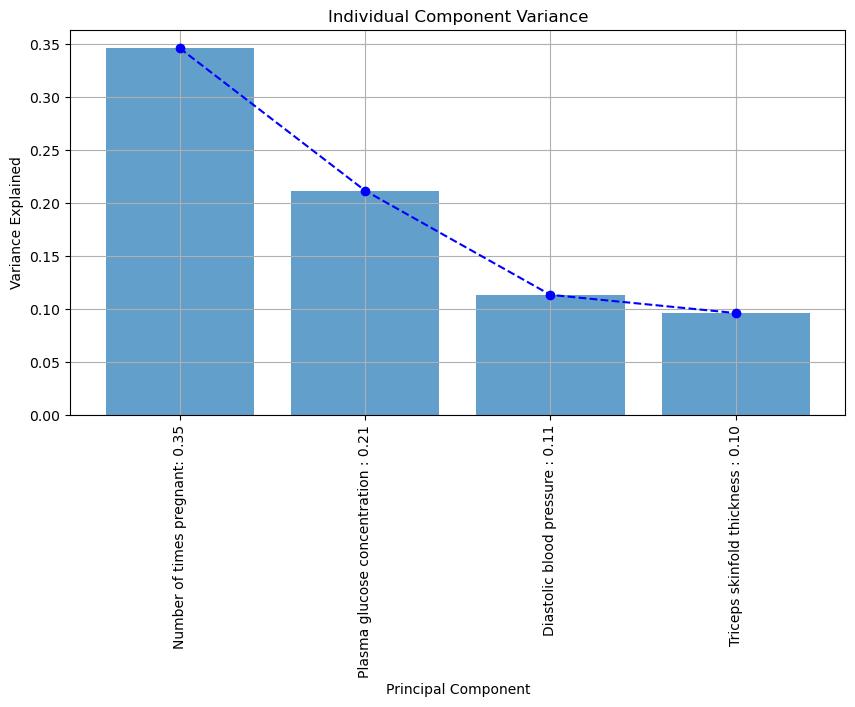

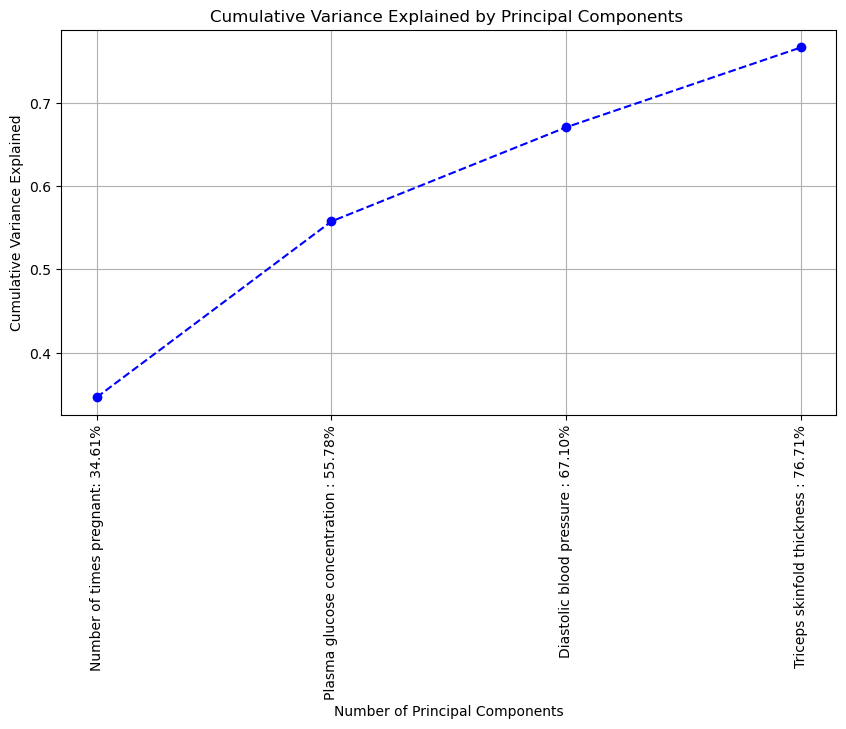

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


                     training_accuracy  accuracy  precision  recall  f1_score
Logistic Regression           0.721535  0.698020   0.646617    0.86  0.738197
Random Forest                 0.831683  0.732673   0.694915    0.82  0.752294
SVM                           0.790842  0.727723   0.689076    0.82  0.748858
KNN                           0.857673  0.747525   0.716814    0.81  0.760563
Naive Bayes                   0.711634  0.658416   0.608392    0.87  0.716049
XGBoost                       0.866337  0.727723   0.685950    0.83  0.751131


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


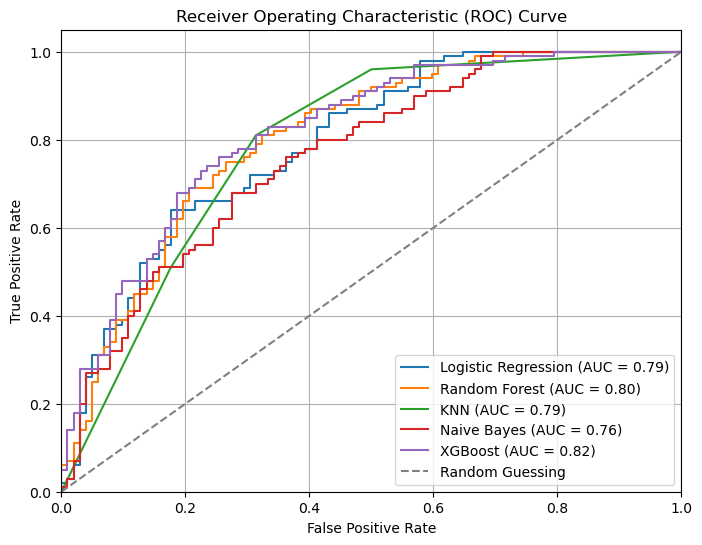

In [169]:
# Apply PCA with 4 components
pca = PCA(n_components=4)


X_adasyn_pca4 = pca.fit_transform(X_adasyn)
# Individual component variance
individual_variance = pca.explained_variance_ratio_
print(individual_variance)

# Cumulative variance explained by each component
cumulative_variance_ratio_ = individual_variance.cumsum()
print(cumulative_variance_ratio_)

# Getting the names of the original features
feature_names = X_adasyn.columns

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), individual_variance, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Individual Component Variance')
plt.xticks(range(1, len(individual_variance) + 1),[f"{feature_names[i]}: {individual_variance[i]:.2f}" for i in range(len(individual_variance))], rotation=90)
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), cumulative_variance_ratio_, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components ')
plt.xticks(range(1, len(cumulative_variance_ratio_) + 1),[f"{feature_names[i]}: {cumulative_variance_ratio_[i] * 100:.2f}%" for i in range(len(cumulative_variance_ratio_))], rotation=90)
plt.grid(True)
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_adasyn_pca4, y_adasyn, test_size=0.2, random_state=42)

# ------  Modeling ------
models = {
    'Logistic Regression': LogisticRegression(C=0.01, penalty='none', solver='lbfgs', class_weight = {0: 0.5, 1: 1, 2: 2}, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=25, n_estimators=200, random_state=42),
    'SVM': SVC(C=20, kernel='rbf', random_state=42), 
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Naive Bayes': GaussianNB(priors= [0.3, 0.7]),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=10, subsample=0.8)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    # Use cross-validation for more robust evaluation
    #cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'training_accuracy': accuracy_score(y_train, y_train_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# ------  Results Visualization ------
print(pd.DataFrame(results).T)

# Train and evaluate models
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores[name] = roc_auc

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

[0.34612281 0.21164662 0.11326203 0.09607182 0.09305964 0.0655798
 0.047546   0.02671128]
[0.34612281 0.55776943 0.67103146 0.76710328 0.86016292 0.92574272
 0.97328872 1.        ]


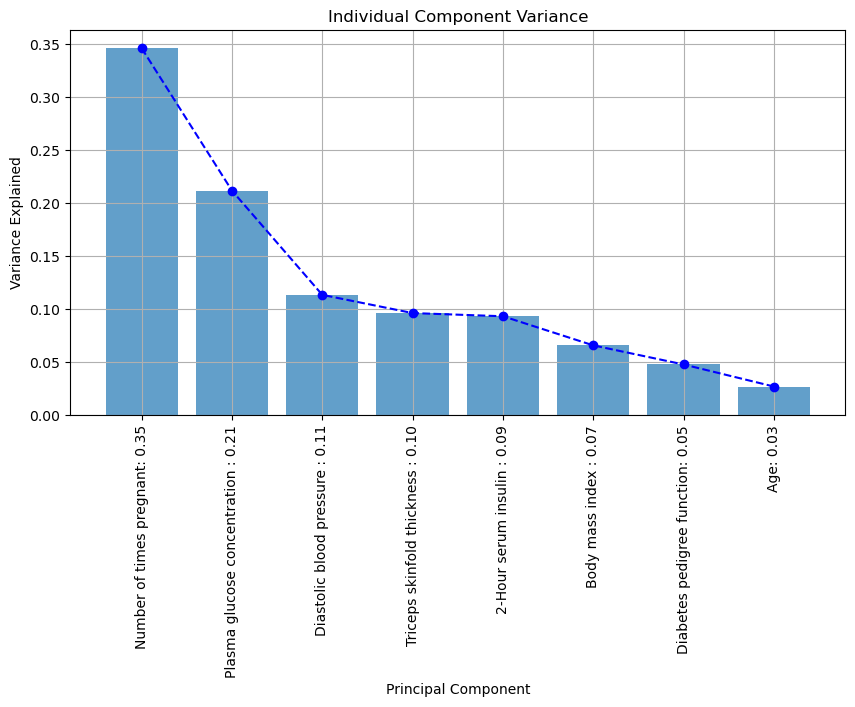

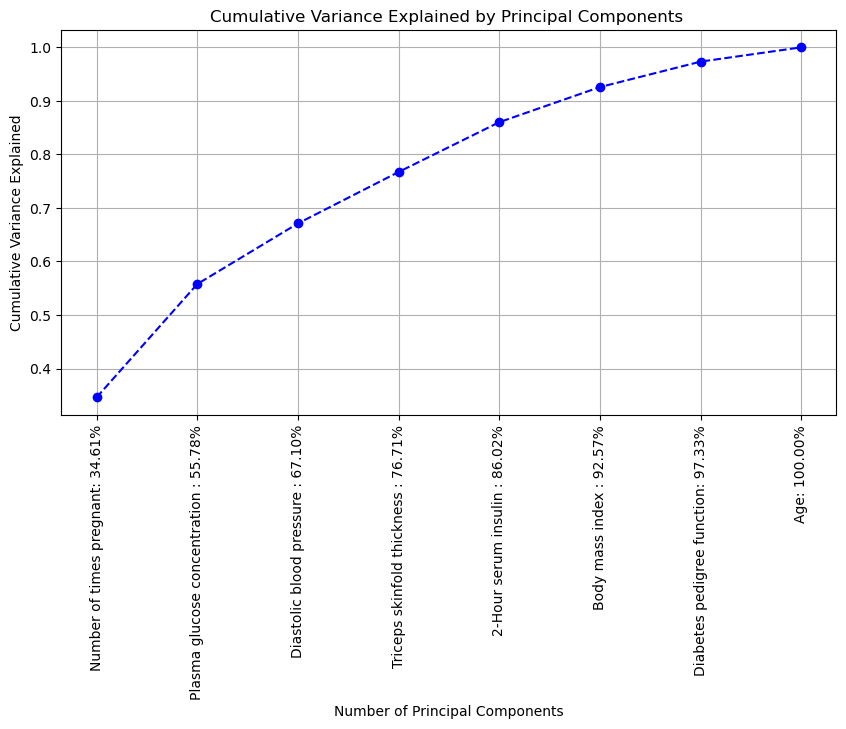

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


                     training_accuracy  accuracy  precision  recall  f1_score
Logistic Regression           0.735149  0.673267   0.628788    0.83  0.715517
Random Forest                 0.870050  0.737624   0.704348    0.81  0.753488
SVM                           0.907178  0.777228   0.761905    0.80  0.780488
KNN                           0.891089  0.777228   0.713178    0.92  0.803493
Naive Bayes                   0.705446  0.673267   0.626866    0.84  0.717949
XGBoost                       0.900990  0.762376   0.736364    0.81  0.771429


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


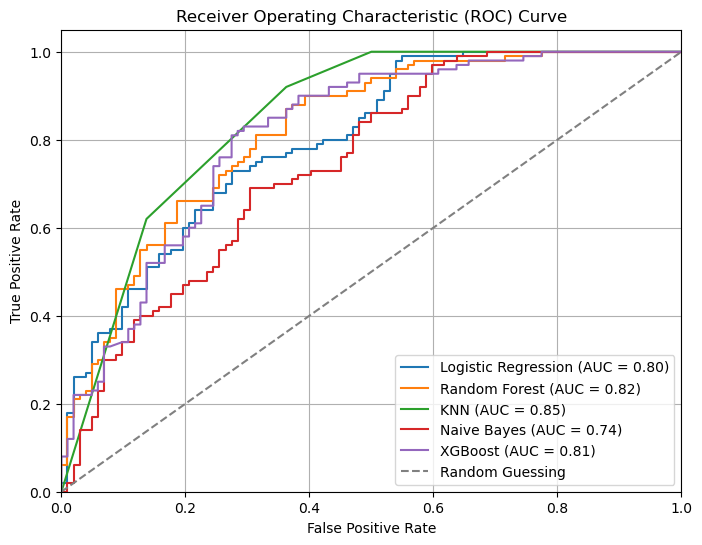

In [170]:
# Apply PCA with all components
pca = PCA()


X_adasyn_pca = pca.fit_transform(X_adasyn)
# Individual component variance
individual_variance = pca.explained_variance_ratio_
print(individual_variance)

# Cumulative variance explained by each component
cumulative_variance_ratio_ = individual_variance.cumsum()
print(cumulative_variance_ratio_)

# Getting the names of the original features
feature_names = X_adasyn.columns

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), individual_variance, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Individual Component Variance')
plt.xticks(range(1, len(individual_variance) + 1),[f"{feature_names[i]}: {individual_variance[i]:.2f}" for i in range(len(individual_variance))], rotation=90)
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), cumulative_variance_ratio_, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components ')
plt.xticks(range(1, len(cumulative_variance_ratio_) + 1),[f"{feature_names[i]}: {cumulative_variance_ratio_[i] * 100:.2f}%" for i in range(len(cumulative_variance_ratio_))], rotation=90)
plt.grid(True)
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_adasyn_pca, y_adasyn, test_size=0.2, random_state=42)

# ------  Modeling ------
models = {
    'Logistic Regression': LogisticRegression(C=0.01, penalty='none', solver='lbfgs', class_weight = {0: 0.5, 1: 1, 2: 2}, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=25, n_estimators=200, random_state=42),
    'SVM': SVC(C=20, kernel='rbf', random_state=42), 
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Naive Bayes': GaussianNB(priors= [0.3, 0.7]),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=10, subsample=0.8)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    # Use cross-validation for more robust evaluation
    #cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'training_accuracy': accuracy_score(y_train, y_train_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# ------  Results Visualization ------
print(pd.DataFrame(results).T)

# Train and evaluate models
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores[name] = roc_auc

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

[0.33229826 0.21926868]
[0.33229826 0.55156694]


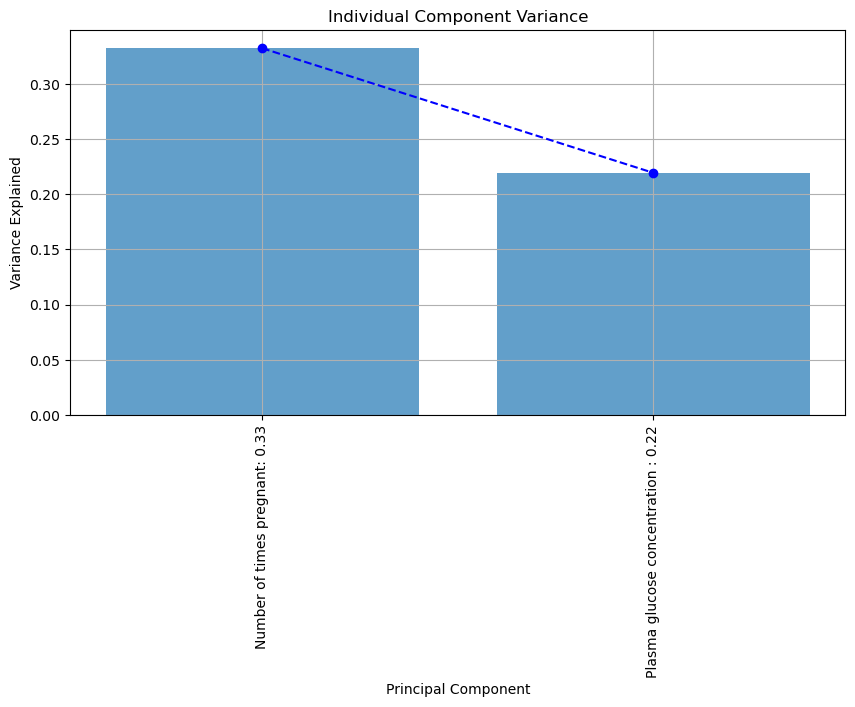

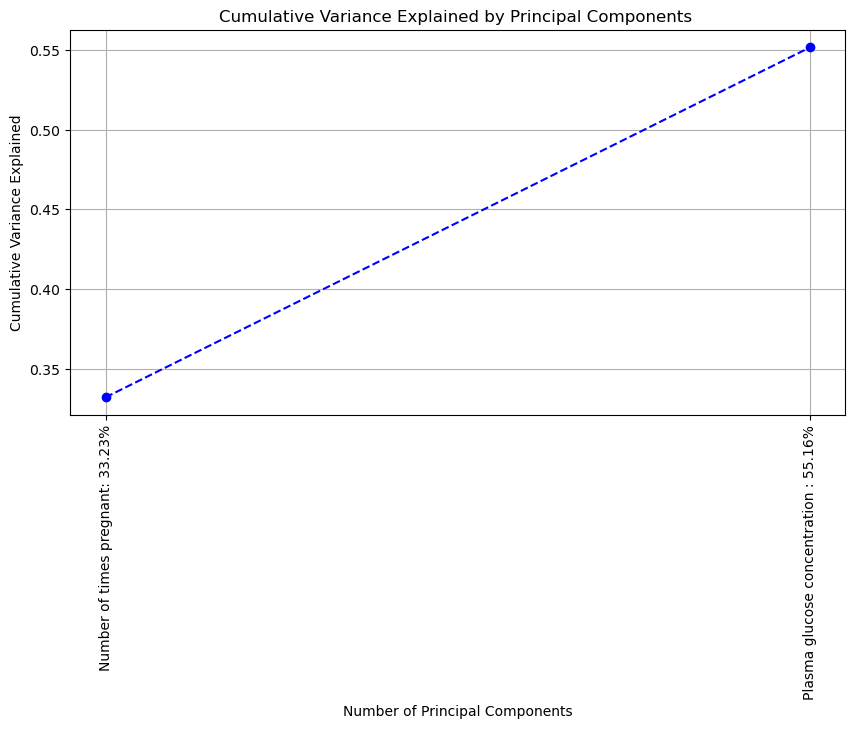

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


                     training_accuracy  accuracy  precision    recall  \
Logistic Regression            0.71125      0.70   0.649635  0.881188   
Random Forest                  0.80125      0.71   0.690265  0.772277   
SVM                            0.75250      0.71   0.677686  0.811881   
KNN                            0.85250      0.73   0.723810  0.752475   
Naive Bayes                    0.68375      0.68   0.620915  0.940594   
XGBoost                        0.84000      0.73   0.711712  0.782178   

                     f1_score  
Logistic Regression  0.747899  
Random Forest        0.728972  
SVM                  0.738739  
KNN                  0.737864  
Naive Bayes          0.748031  
XGBoost              0.745283  


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


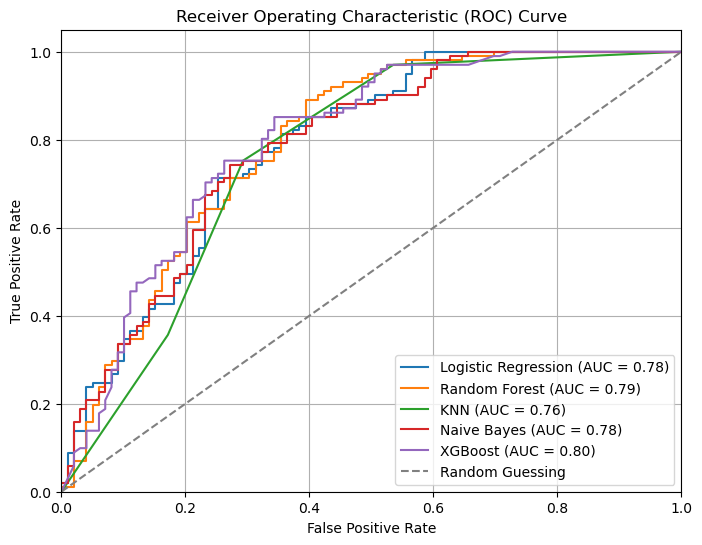

In [171]:
# Apply PCA
pca = PCA(n_components=2)


X_smote_borderline_pca2 = pca.fit_transform(X_smote_borderline)
# Individual component variance
individual_variance = pca.explained_variance_ratio_
print(individual_variance)

# Cumulative variance explained by each component
cumulative_variance_ratio_ = individual_variance.cumsum()
print(cumulative_variance_ratio_)

# Getting the names of the original features
feature_names = X_smote_borderline.columns

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), individual_variance, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Individual Component Variance')
plt.xticks(range(1, len(individual_variance) + 1),[f"{feature_names[i]}: {individual_variance[i]:.2f}" for i in range(len(individual_variance))], rotation=90)
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), cumulative_variance_ratio_, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components ')
plt.xticks(range(1, len(cumulative_variance_ratio_) + 1),[f"{feature_names[i]}: {cumulative_variance_ratio_[i] * 100:.2f}%" for i in range(len(cumulative_variance_ratio_))], rotation=90)
plt.grid(True)
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote_borderline_pca2, y_smote_borderline, test_size=0.2, random_state=42)

# ------  Modeling ------
models = {
    'Logistic Regression': LogisticRegression(C=0.01, penalty='none', solver='lbfgs', class_weight = {0: 0.5, 1: 1, 2: 2}, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=25, n_estimators=200, random_state=42),
    'SVM': SVC(C=20, kernel='rbf', random_state=42), 
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Naive Bayes': GaussianNB(priors= [0.3, 0.7]),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=10, subsample=0.8)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    # Use cross-validation for more robust evaluation
    #cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'training_accuracy': accuracy_score(y_train, y_train_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# ------  Results Visualization ------
print(pd.DataFrame(results).T)

# Train and evaluate models
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores[name] = roc_auc

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


[0.33229826 0.21926868 0.11074456 0.10171345]
[0.33229826 0.55156694 0.6623115  0.76402495]


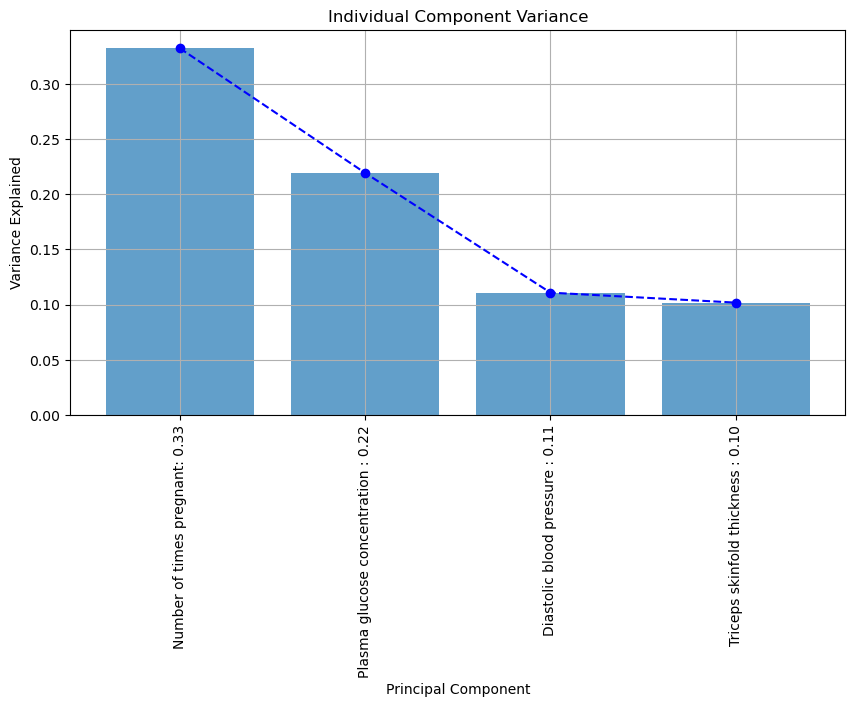

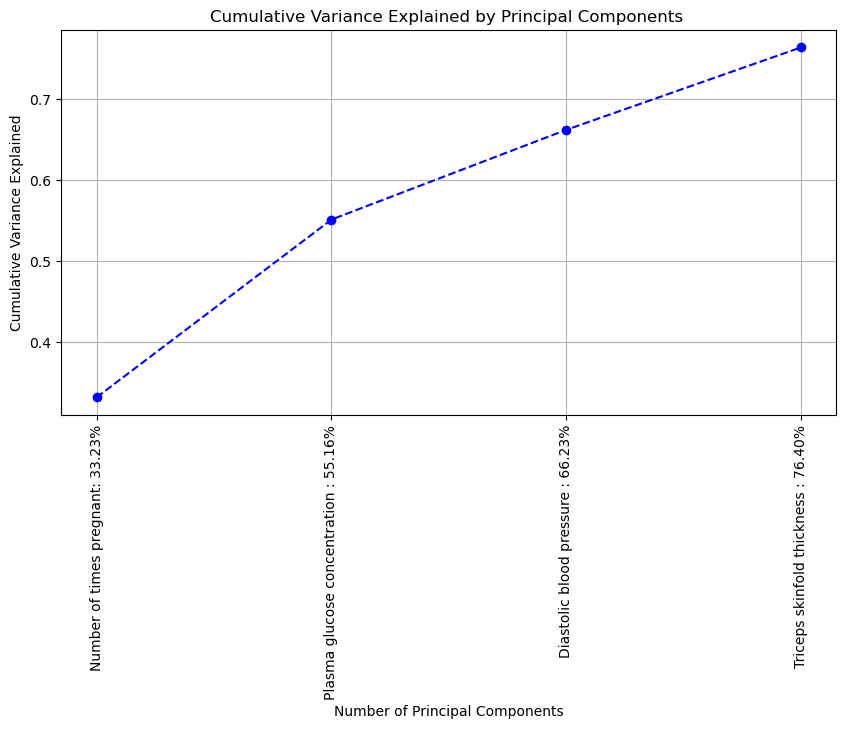

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


                     training_accuracy  accuracy  precision    recall  \
Logistic Regression            0.72000     0.695   0.642857  0.891089   
Random Forest                  0.85000     0.715   0.689655  0.792079   
SVM                            0.82250     0.740   0.716814  0.801980   
KNN                            0.86125     0.800   0.765217  0.871287   
Naive Bayes                    0.69750     0.665   0.611842  0.920792   
XGBoost                        0.88125     0.760   0.726496  0.841584   

                     f1_score  
Logistic Regression  0.746888  
Random Forest        0.737327  
SVM                  0.757009  
KNN                  0.814815  
Naive Bayes          0.735178  
XGBoost              0.779817  


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


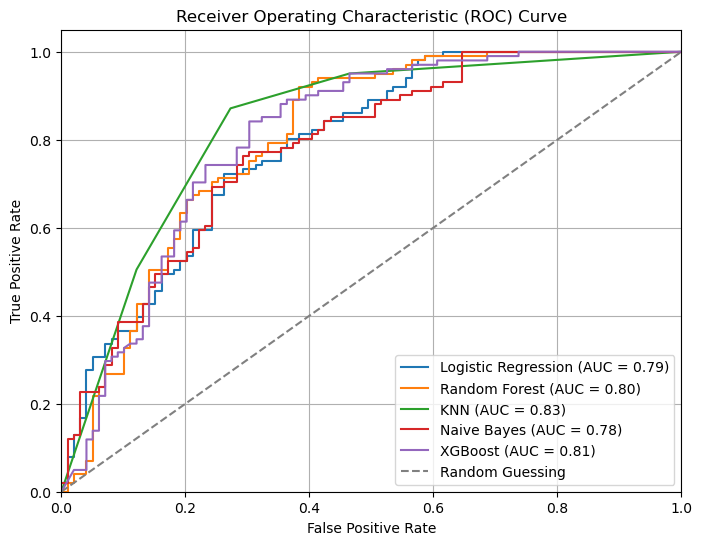

In [172]:
# Apply PCA with 4 components
pca = PCA(n_components=4)


X_smote_borderline_pca4 = pca.fit_transform(X_smote_borderline)
# Individual component variance
individual_variance = pca.explained_variance_ratio_
print(individual_variance)

# Cumulative variance explained by each component
cumulative_variance_ratio_ = individual_variance.cumsum()
print(cumulative_variance_ratio_)

# Getting the names of the original features
feature_names = X_smote_borderline.columns

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), individual_variance, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Individual Component Variance')
plt.xticks(range(1, len(individual_variance) + 1),[f"{feature_names[i]}: {individual_variance[i]:.2f}" for i in range(len(individual_variance))], rotation=90)
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), cumulative_variance_ratio_, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components ')
plt.xticks(range(1, len(cumulative_variance_ratio_) + 1),[f"{feature_names[i]}: {cumulative_variance_ratio_[i] * 100:.2f}%" for i in range(len(cumulative_variance_ratio_))], rotation=90)
plt.grid(True)
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote_borderline_pca4, y_smote_borderline, test_size=0.2, random_state=42)

# ------  Modeling ------
models = {
    'Logistic Regression': LogisticRegression(C=0.01, penalty='none', solver='lbfgs', class_weight = {0: 0.5, 1: 1, 2: 2}, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=25, n_estimators=200, random_state=42),
    'SVM': SVC(C=20, kernel='rbf', random_state=42), 
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Naive Bayes': GaussianNB(priors= [0.3, 0.7]),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=10, subsample=0.8)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    # Use cross-validation for more robust evaluation
    #cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'training_accuracy': accuracy_score(y_train, y_train_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# ------  Results Visualization ------
print(pd.DataFrame(results).T)

# Train and evaluate models
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores[name] = roc_auc

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

[0.33229826 0.21926868 0.11074456 0.10171345 0.09183944 0.06682941
 0.04979888 0.02750731]
[0.33229826 0.55156694 0.6623115  0.76402495 0.85586439 0.92269381
 0.97249269 1.        ]


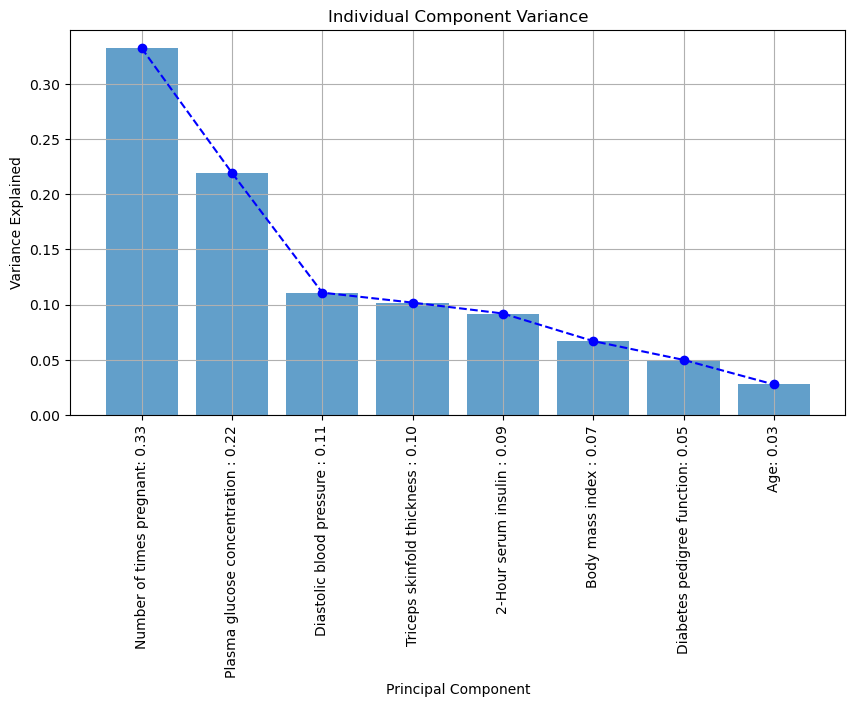

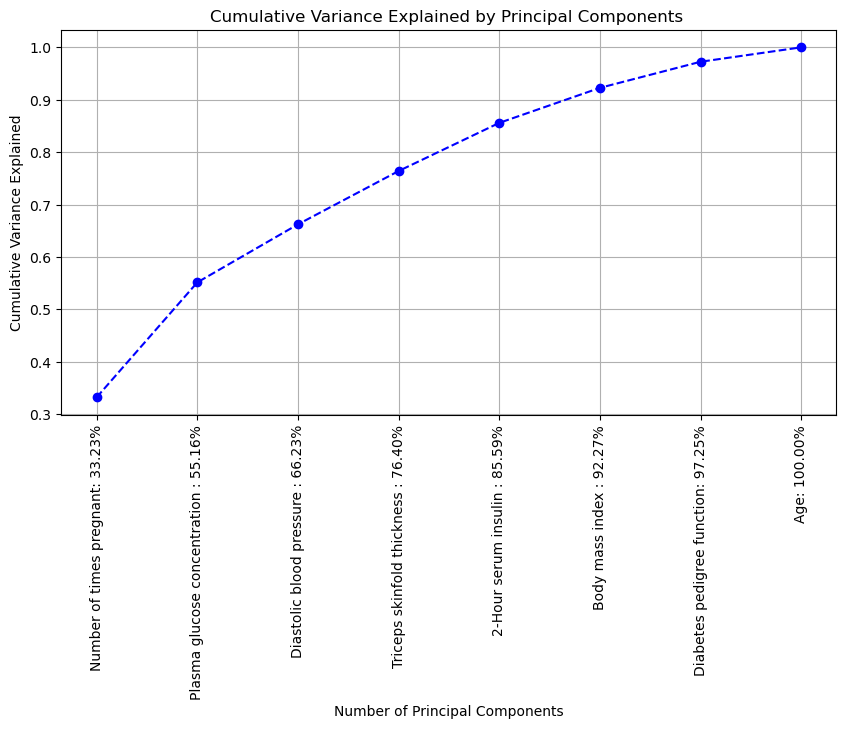

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


                     training_accuracy  accuracy  precision    recall  \
Logistic Regression            0.72750     0.715   0.657143  0.910891   
Random Forest                  0.87500     0.760   0.722689  0.851485   
SVM                            0.92500     0.760   0.734513  0.821782   
KNN                            0.87875     0.820   0.760000  0.940594   
Naive Bayes                    0.71000     0.690   0.636364  0.900990   
XGBoost                        0.92000     0.800   0.765217  0.871287   

                     f1_score  
Logistic Regression  0.763485  
Random Forest        0.781818  
SVM                  0.775701  
KNN                  0.840708  
Naive Bayes          0.745902  
XGBoost              0.814815  


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


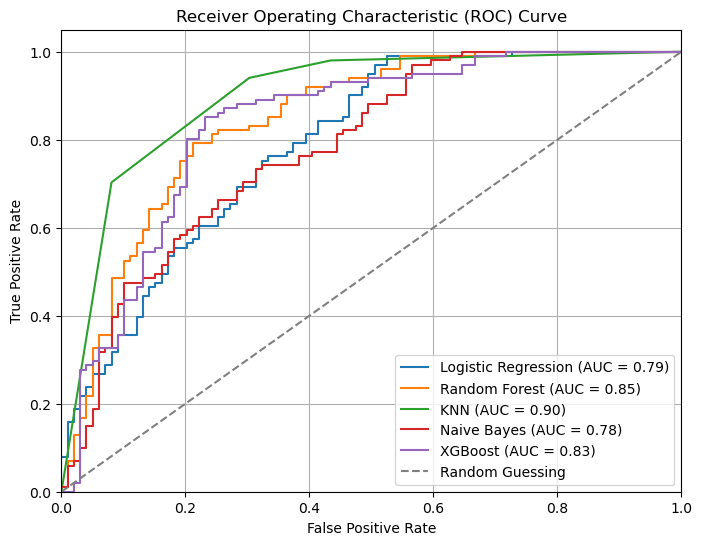

In [173]:
# Apply PCA with all components
pca = PCA()


X_smote_borderline_pca = pca.fit_transform(X_smote_borderline)
# Individual component variance
individual_variance = pca.explained_variance_ratio_
print(individual_variance)

# Cumulative variance explained by each component
cumulative_variance_ratio_ = individual_variance.cumsum()
print(cumulative_variance_ratio_)

# Getting the names of the original features
feature_names = X_smote_borderline.columns

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), individual_variance, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Individual Component Variance')
plt.xticks(range(1, len(individual_variance) + 1),[f"{feature_names[i]}: {individual_variance[i]:.2f}" for i in range(len(individual_variance))], rotation=90)
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), cumulative_variance_ratio_, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components ')
plt.xticks(range(1, len(cumulative_variance_ratio_) + 1),[f"{feature_names[i]}: {cumulative_variance_ratio_[i] * 100:.2f}%" for i in range(len(cumulative_variance_ratio_))], rotation=90)
plt.grid(True)
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote_borderline_pca, y_smote_borderline, test_size=0.2, random_state=42)

# ------  Modeling ------
models = {
    'Logistic Regression': LogisticRegression(C=0.01, penalty='none', solver='lbfgs', class_weight = {0: 0.5, 1: 1, 2: 2}, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=25, n_estimators=200, random_state=42),
    'SVM': SVC(C=20, kernel='rbf', random_state=42), 
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Naive Bayes': GaussianNB(priors= [0.3, 0.7]),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=10, subsample=0.8)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    # Use cross-validation for more robust evaluation
    #cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'training_accuracy': accuracy_score(y_train, y_train_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# ------  Results Visualization ------
print(pd.DataFrame(results).T)

# Train and evaluate models
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores[name] = roc_auc

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

[0.32496719 0.21231601]
[0.32496719 0.5372832 ]


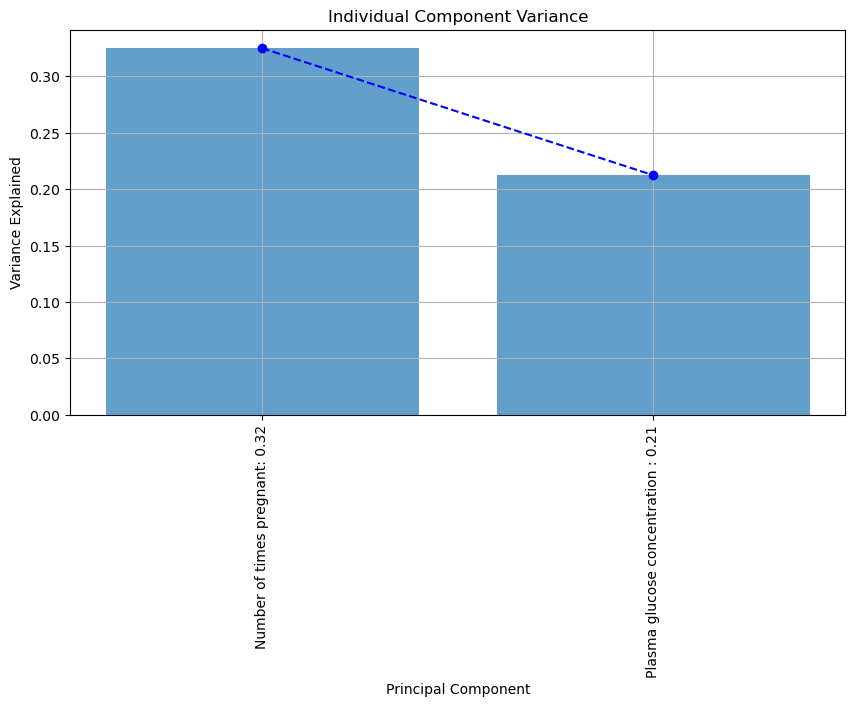

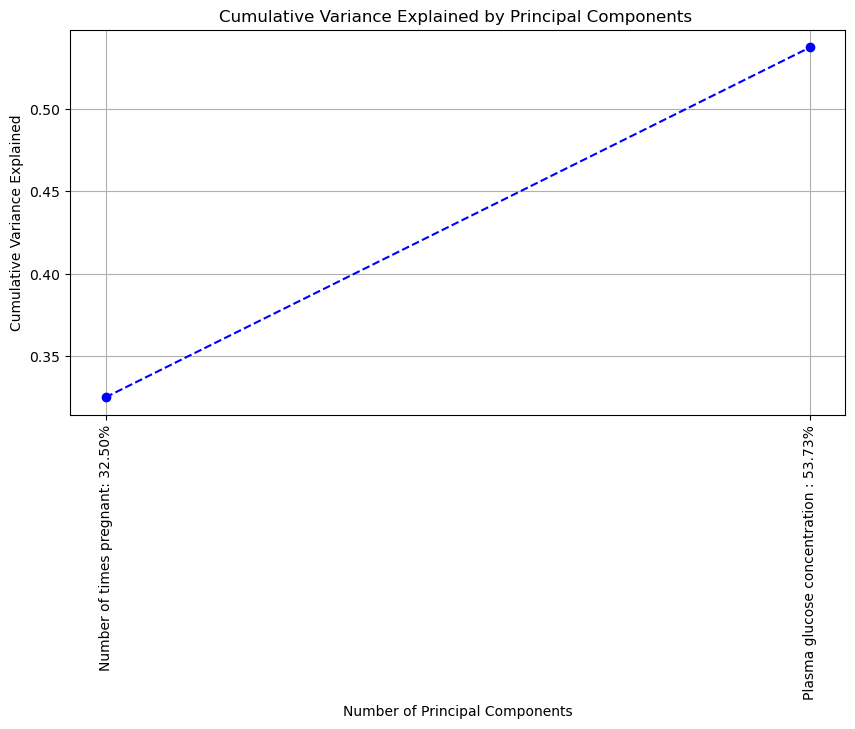

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


                     training_accuracy  accuracy  precision    recall  \
Logistic Regression            0.73125     0.745   0.678571  0.940594   
Random Forest                  0.80875     0.745   0.723214  0.801980   
SVM                            0.76375     0.745   0.711864  0.831683   
KNN                            0.85000     0.730   0.723810  0.752475   
Naive Bayes                    0.71875     0.700   0.637584  0.940594   
XGBoost                        0.84000     0.715   0.700000  0.762376   

                     f1_score  
Logistic Regression  0.788382  
Random Forest        0.760563  
SVM                  0.767123  
KNN                  0.737864  
Naive Bayes          0.760000  
XGBoost              0.729858  


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


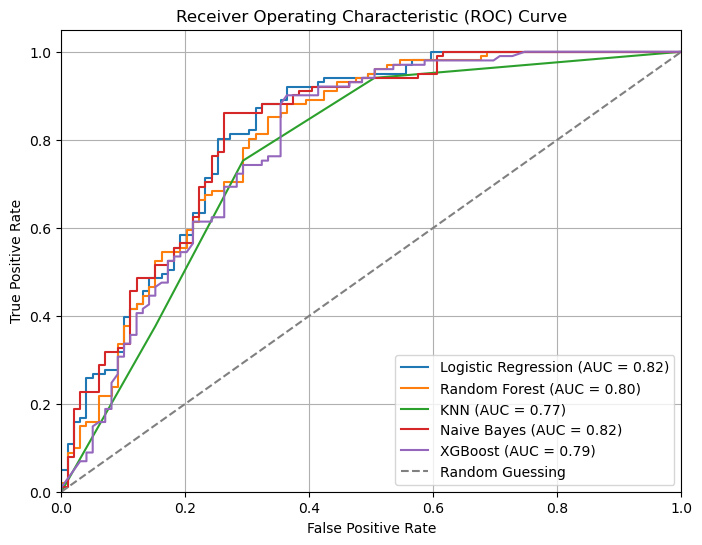

In [174]:
# Apply PCA
pca = PCA(n_components=2)


X_smote_svm_pca2 = pca.fit_transform(X_smote_svm)
# Individual component variance
individual_variance = pca.explained_variance_ratio_
print(individual_variance)

# Cumulative variance explained by each component
cumulative_variance_ratio_ = individual_variance.cumsum()
print(cumulative_variance_ratio_)

# Getting the names of the original features
feature_names = X_smote_svm.columns

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), individual_variance, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Individual Component Variance')
plt.xticks(range(1, len(individual_variance) + 1),[f"{feature_names[i]}: {individual_variance[i]:.2f}" for i in range(len(individual_variance))], rotation=90)
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), cumulative_variance_ratio_, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components ')
plt.xticks(range(1, len(cumulative_variance_ratio_) + 1),[f"{feature_names[i]}: {cumulative_variance_ratio_[i] * 100:.2f}%" for i in range(len(cumulative_variance_ratio_))], rotation=90)
plt.grid(True)
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote_svm_pca2, y_smote_svm, test_size=0.2, random_state=42)

# ------  Modeling ------
models = {
    'Logistic Regression': LogisticRegression(C=0.01, penalty='none', solver='lbfgs', class_weight = {0: 0.5, 1: 1, 2: 2}, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=25, n_estimators=200, random_state=42),
    'SVM': SVC(C=20, kernel='rbf', random_state=42), 
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Naive Bayes': GaussianNB(priors= [0.3, 0.7]),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=10, subsample=0.8)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    # Use cross-validation for more robust evaluation
    #cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'training_accuracy': accuracy_score(y_train, y_train_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# ------  Results Visualization ------
print(pd.DataFrame(results).T)

# Train and evaluate models
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores[name] = roc_auc

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

[0.32496719 0.21231601 0.11747231 0.10060094]
[0.32496719 0.5372832  0.65475551 0.75535646]


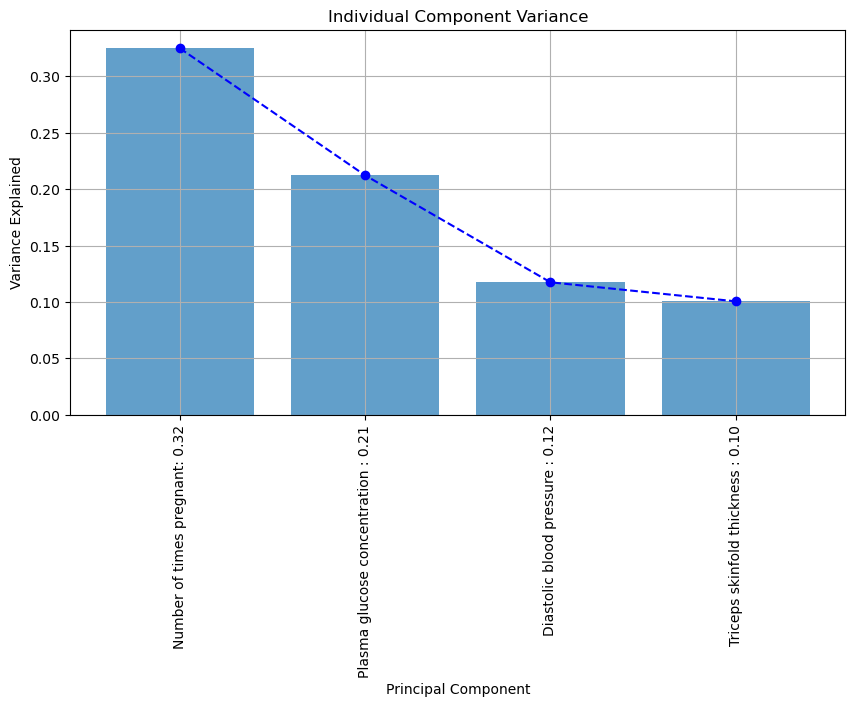

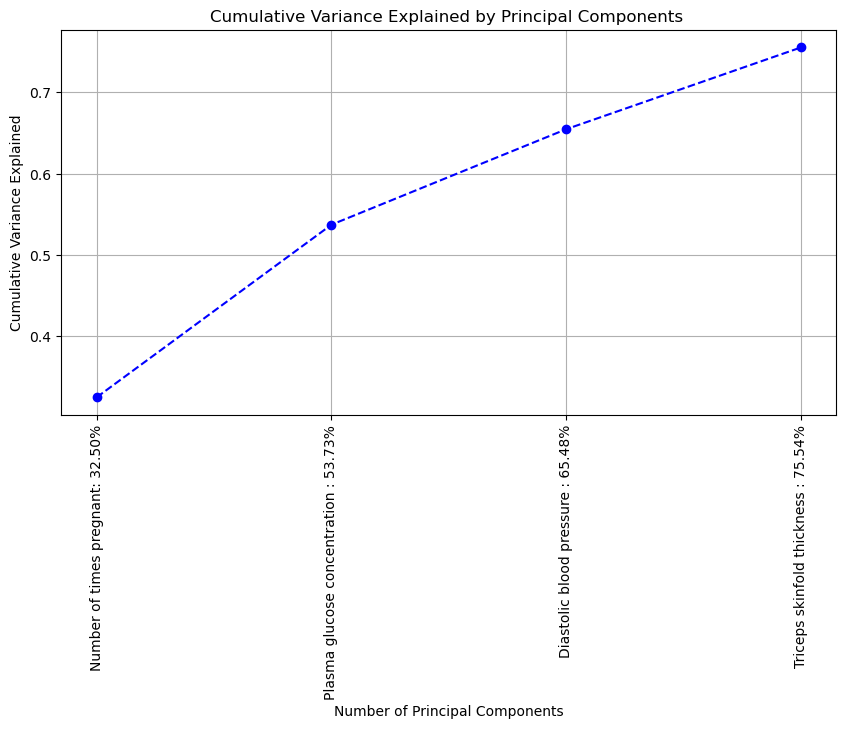

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


                     training_accuracy  accuracy  precision    recall  \
Logistic Regression            0.72875     0.745   0.678571  0.940594   
Random Forest                  0.83250     0.760   0.738739  0.811881   
SVM                            0.82750     0.765   0.725000  0.861386   
KNN                            0.86500     0.810   0.764706  0.900990   
Naive Bayes                    0.71500     0.710   0.646259  0.940594   
XGBoost                        0.89875     0.785   0.758929  0.841584   

                     f1_score  
Logistic Regression  0.788382  
Random Forest        0.773585  
SVM                  0.787330  
KNN                  0.827273  
Naive Bayes          0.766129  
XGBoost              0.798122  


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


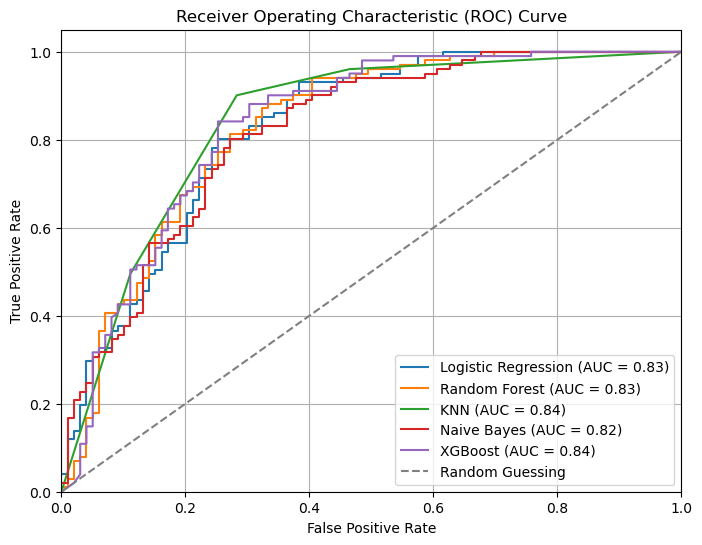

In [175]:
# Apply PCA
pca = PCA(n_components=4)


X_smote_svm_pca4 = pca.fit_transform(X_smote_svm)
# Individual component variance
individual_variance = pca.explained_variance_ratio_
print(individual_variance)

# Cumulative variance explained by each component
cumulative_variance_ratio_ = individual_variance.cumsum()
print(cumulative_variance_ratio_)

# Getting the names of the original features
feature_names = X_smote_svm.columns

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), individual_variance, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Individual Component Variance')
plt.xticks(range(1, len(individual_variance) + 1),[f"{feature_names[i]}: {individual_variance[i]:.2f}" for i in range(len(individual_variance))], rotation=90)
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), cumulative_variance_ratio_, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components ')
plt.xticks(range(1, len(cumulative_variance_ratio_) + 1),[f"{feature_names[i]}: {cumulative_variance_ratio_[i] * 100:.2f}%" for i in range(len(cumulative_variance_ratio_))], rotation=90)
plt.grid(True)
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote_svm_pca4, y_smote_svm, test_size=0.2, random_state=42)

# ------  Modeling ------
models = {
    'Logistic Regression': LogisticRegression(C=0.01, penalty='none', solver='lbfgs', class_weight = {0: 0.5, 1: 1, 2: 2}, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=25, n_estimators=200, random_state=42),
    'SVM': SVC(C=20, kernel='rbf', random_state=42), 
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Naive Bayes': GaussianNB(priors= [0.3, 0.7]),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=10, subsample=0.8)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    # Use cross-validation for more robust evaluation
    #cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'training_accuracy': accuracy_score(y_train, y_train_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# ------  Results Visualization ------
print(pd.DataFrame(results).T)

# Train and evaluate models
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores[name] = roc_auc

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

[0.32496719 0.21231601 0.11747231 0.10060094 0.08428776 0.07440723
 0.05353255 0.03241601]
[0.32496719 0.5372832  0.65475551 0.75535646 0.83964422 0.91405145
 0.96758399 1.        ]


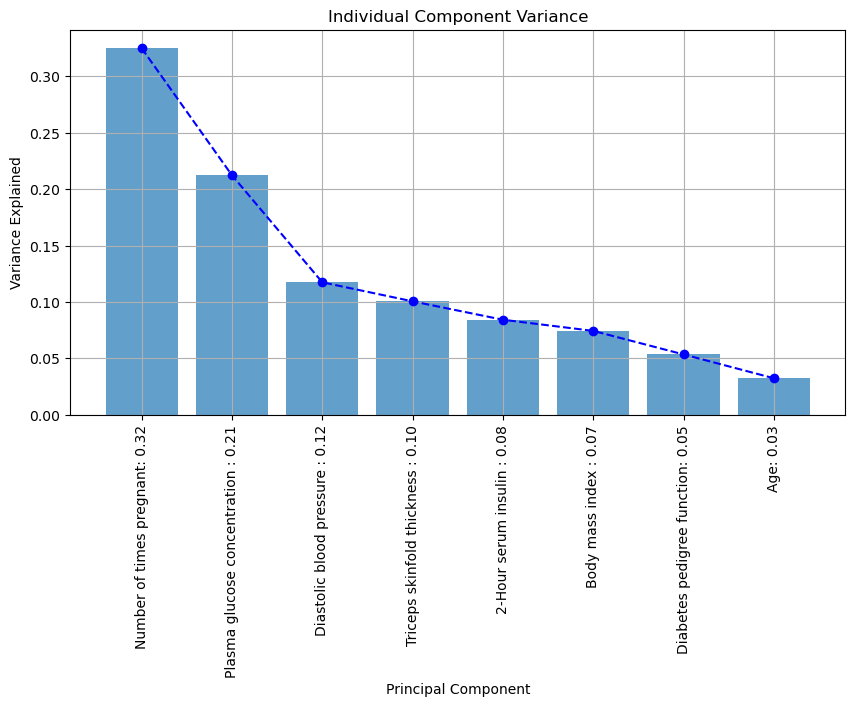

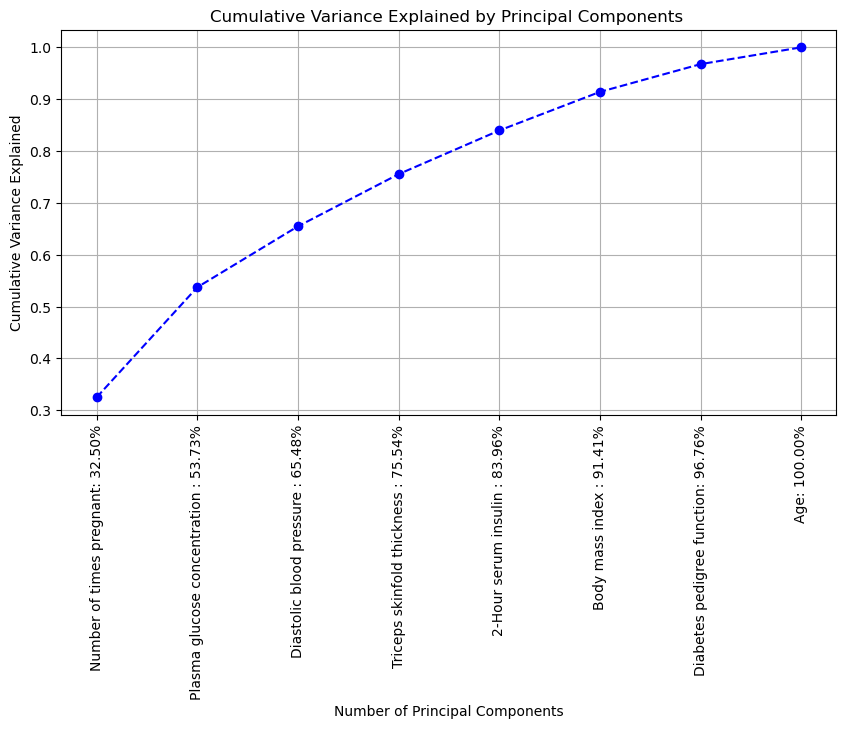

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


                     training_accuracy  accuracy  precision    recall  \
Logistic Regression            0.74250     0.735   0.673913  0.920792   
Random Forest                  0.88250     0.785   0.750000  0.861386   
SVM                            0.91750     0.790   0.761062  0.851485   
KNN                            0.87875     0.830   0.781513  0.920792   
Naive Bayes                    0.70125     0.735   0.681818  0.891089   
XGBoost                        0.92000     0.790   0.770642  0.831683   

                     f1_score  
Logistic Regression  0.778243  
Random Forest        0.801843  
SVM                  0.803738  
KNN                  0.845455  
Naive Bayes          0.772532  
XGBoost              0.800000  


C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


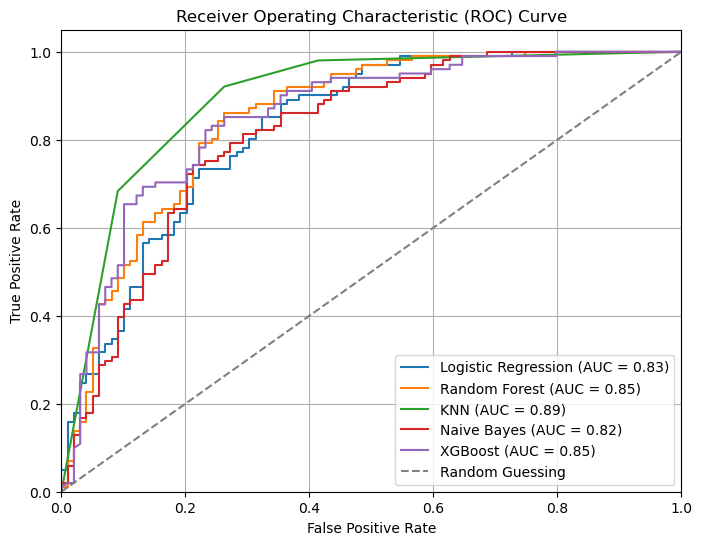

In [176]:
# Apply PCA
pca = PCA()


X_smote_svm_pca = pca.fit_transform(X_smote_svm)
# Individual component variance
individual_variance = pca.explained_variance_ratio_
print(individual_variance)

# Cumulative variance explained by each component
cumulative_variance_ratio_ = individual_variance.cumsum()
print(cumulative_variance_ratio_)

# Getting the names of the original features
feature_names = X_smote_svm.columns

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), individual_variance, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Individual Component Variance')
plt.xticks(range(1, len(individual_variance) + 1),[f"{feature_names[i]}: {individual_variance[i]:.2f}" for i in range(len(individual_variance))], rotation=90)
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio_) + 1), cumulative_variance_ratio_, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components ')
plt.xticks(range(1, len(cumulative_variance_ratio_) + 1),[f"{feature_names[i]}: {cumulative_variance_ratio_[i] * 100:.2f}%" for i in range(len(cumulative_variance_ratio_))], rotation=90)
plt.grid(True)
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote_svm_pca, y_smote_svm, test_size=0.2, random_state=42)

# ------  Modeling ------
models = {
    'Logistic Regression': LogisticRegression(C=0.01, penalty='none', solver='lbfgs', class_weight = {0: 0.5, 1: 1, 2: 2}, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=25, n_estimators=200, random_state=42),
    'SVM': SVC(C=20, kernel='rbf', random_state=42), 
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Naive Bayes': GaussianNB(priors= [0.3, 0.7]),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=10, subsample=0.8)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    # Use cross-validation for more robust evaluation
    #cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'training_accuracy': accuracy_score(y_train, y_train_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# ------  Results Visualization ------
print(pd.DataFrame(results).T)

# Train and evaluate models
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores[name] = roc_auc

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()